In [202]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [203]:
df=pd.read_csv('car data.csv')

In [204]:
df.head(15)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [205]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [206]:
#check if numbers are not in string format or they're..
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [207]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [208]:
#label encoding ???? #giving numbers to each category
from sklearn.preprocessing import LabelEncoder



In [209]:
Car_Name_le = LabelEncoder()
df['Car_Name']=Car_Name_le.fit_transform(df['Car_Name'])

In [210]:
df.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [211]:
#now either one hot or label encoding can be used in fuel type...
Fuel_Type_le = LabelEncoder()
df.Fuel_Type = Fuel_Type_le.fit_transform(df['Fuel_Type'])

In [212]:
#label encoding on seller type also
Seller_Type_le = LabelEncoder()
df.Seller_Type = Seller_Type_le.fit_transform(df.Seller_Type)


In [213]:
Transmission_le = LabelEncoder()
df.Transmission = Transmission_le.fit_transform(df.Transmission)

In [214]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [215]:
# I shouldn't remove or manipulate outliers in this case , merscedes...

In [216]:
# and some algos don't wanna work with outliers in the data ---->> (linear, distance and tree) based models suffer
# therefore go for -->> Median-based methods, svm , gb/xgb, randomforest

In [217]:
X=df.drop('Selling_Price', axis=1)

In [218]:
X

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,5.59,27000,2,0,1,0
1,93,2013,9.54,43000,1,0,1,0
2,68,2017,9.85,6900,2,0,1,0
3,96,2011,4.15,5200,2,0,1,0
4,92,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,69,2016,11.60,33988,1,0,1,0
297,66,2015,5.90,60000,2,0,1,0
298,69,2009,11.00,87934,2,0,1,0
299,69,2017,12.50,9000,1,0,1,0


In [219]:
y=df.Selling_Price

In [220]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [221]:
# train test split
from sklearn.model_selection import train_test_split

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.2)

In [223]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [224]:
X_train

array([[-1.86352444, -1.96986094, -0.75359579, ...,  1.33816952,
         0.37796447,  3.52821143],
       [-2.17378866,  1.15644297, -0.73130669, ...,  1.33816952,
         0.37796447, -0.18569534],
       [-1.70839234, -1.96986094, -0.7494723 , ...,  1.33816952,
         0.37796447, -0.18569534],
       ...,
       [-0.85516574,  0.11434167, -0.45269297, ...,  1.33816952,
         0.37796447,  3.52821143],
       [ 0.26954204, -0.92775963,  0.27727498, ..., -0.74728947,
         0.37796447, -0.18569534],
       [-0.77759969,  1.15644297, -0.63880693, ...,  1.33816952,
         0.37796447, -0.18569534]])

<Axes: >

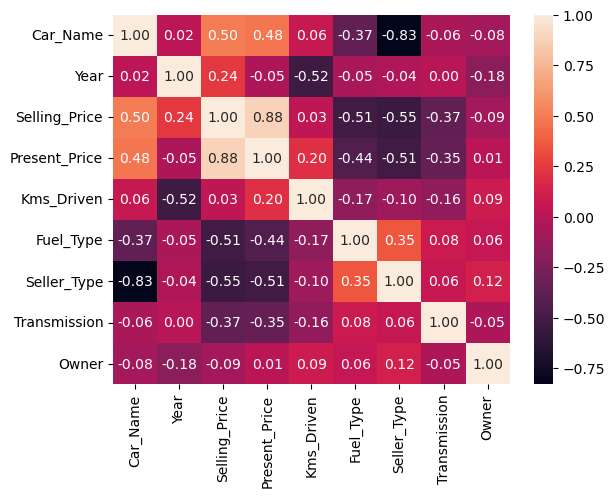

In [225]:
sns.heatmap(df.corr(),annot=True,fmt=".2f") #no linear relationships at many places (inverse)

In [226]:
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
#all are algos of supervise ml algos


#some bosting and bagging algos
from sklearn.ensemble import RandomForestRegressor

In [227]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [228]:
# to check for overfitting , check accuracy on training data also 

In [229]:
lr.score(X_train , y_train)*100 ,  lr.score(X_test, y_test)*100  #R2 score ratio cofficient

(88.40630578239453, 84.65539666857805)

In [230]:
lr1 = Lasso(0.1)
lr1.fit(X_train, y_train)
lr1.score(X_train , y_train)*100 ,  lr1.score(X_test, y_test)*100  #R2 score ratio cofficient

(88.21384916551473, 84.08243964905222)

In [231]:
lr2 = Ridge(alpha=5)
lr2.fit(X_train, y_train)
lr2.score(X_train , y_train)*100 ,  lr2.score(X_test, y_test)*100  #R2 score ratio cofficient

(88.36878030828494, 84.40977933677722)

In [232]:
lr3 = ElasticNet(0.1)
lr3.fit(X_train, y_train)
lr3.score(X_train , y_train)*100 ,  lr3.score(X_test, y_test)*100  #R2 score ratio cofficient

(88.11325119343213, 83.72063831728086)

In [233]:
dt = DecisionTreeRegressor(max_depth=13)
dt.fit(X_train, y_train)
dt.score(X_train , y_train)*100 ,  dt.score(X_test, y_test)*100  #R2 score ratio cofficient

(99.99987522774822, 95.59990633539523)

In [234]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.score(X_train , y_train)*100 ,  rf.score(X_test, y_test)*100  #R2 score ratio cofficient

(98.72840287713163, 96.25538744100972)

In [235]:
svr = SVR()
svr.fit(X_train, y_train)
svr.score(X_train , y_train)*100 ,  svr.score(X_test, y_test)*100  #R2 score ratio cofficient

(65.72897804206286, 78.11659968098952)

In [236]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
knn.score(X_train , y_train)*100 ,  rf.score(X_test, y_test)*100  #R2 score ratio cofficient

(86.54107855059208, 96.25538744100972)

In [237]:
#Now that I've chosen RandomForest doin'gridsearch cv


In [238]:
#checking for decision tree first
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(y_test,dt.predict(X_test)) , mean_absolute_error(y_test, dt.predict(X_test))

(1.0135872950819673, 0.645)

In [239]:
mean_squared_error(y_test ,rf.predict(X_test)), mean_absolute_error(y_test,rf.predict(X_test))

(0.8625933909836078, 0.6056213114754105)

In [240]:
input=['ritz',   2014,  5.59, 27000, 'Petrol',    'Dealer',     'Manual', 0]

In [241]:
new_df = pd.DataFrame([input], columns=X.columns)

In [242]:
new_df

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0


In [243]:
new_df.Car_Name = Car_Name_le.transform(new_df.Car_Name)

In [244]:
new_df.Fuel_Type = Fuel_Type_le.transform(new_df.Fuel_Type)

In [245]:
new_df.Seller_Type = Seller_Type_le.transform(new_df.Seller_Type)

In [246]:
new_df.Transmission = Transmission_le.transform(new_df.Transmission)

In [247]:
new_df = pd.DataFrame(ss.transform(new_df), columns=X.columns)

In [248]:
print('price is :',rf.predict(new_df)[0],'lakhs')

price is : 3.7830000000000035 lakhs


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [249]:
#grid search cv
#randomised search cv
#===>  hyperparameter tuning


In [250]:
#Exporting the models and the preprocessors 
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(rf, f)
with open('Transmission_le.pkl', 'wb') as f: 
    pickle.dump(Transmission_le, f)
with open('Car_Name_le.pkl', 'wb') as f: 
    pickle.dump(Car_Name_le, f)
with open('Fuel_Type_le.pkl', 'wb') as f: 
    pickle.dump(Fuel_Type_le, f)
with open('Seller_Type_le.pkl', 'wb') as f: 
    pickle.dump(Seller_Type_le, f)
with open('scaler.pkl', 'wb') as f: 
    pickle.dump(ss, f)
print('All objects exported successfully!')

All objects exported successfully!
